# Principles of Data Visualization

In [1]:
!pip install seaborn numpy pandas bokeh matplotlib --upgrade

Requirement already up-to-date: seaborn in /anaconda3/lib/python3.7/site-packages (0.9.0)
    100% |████████████████████████████████| 15.1MB 171kB/s ta 0:00:01 2% |▋                               | 307kB 48kB/s eta 0:05:09    53% |█████████████████▎              | 8.2MB 656kB/s eta 0:00:11
Requirement already up-to-date: pandas in /anaconda3/lib/python3.7/site-packages (0.25.3)
Requirement already up-to-date: bokeh in /anaconda3/lib/python3.7/site-packages (1.4.0)
Requirement already up-to-date: matplotlib in /anaconda3/lib/python3.7/site-packages (3.1.2)
  Found existing installation: numpy 1.17.4
    Uninstalling numpy-1.17.4:
      Successfully uninstalled numpy-1.17.4


### Packages Today
- [NumPy](http://www.numpy.org/): Numerical Python - scalars, vectors, matrices, etc. and tools for manipulating them.
- [Pandas](https://pandas.pydata.org/): Python Data Analysis Library - storing/"munging" (cleaning/transforming) data.
- [Matplotlib](https://matplotlib.org/): Python plotting library - this is (unsurprisingly) what we'll use to plot things!
- [Bokeh](https://bokeh.pydata.org/en/latest/): Interactive Visualization Library - this is (also unsurprisingly) what we'll use to generate interactive visualizations!
- [Seaborn](https://seaborn.pydata.org/): Statistical Visualization Library - this is commonly used for more complicated visuals (we'll ignore most of these because they're often less accessible to stakeholders).

<details><summary>Let's get started with a question: what is the point of creating a visualization for data?</summary>
    
- "Use a picture. It's worth a thousand words." - Tess Flanders, 1911
- We generally use visualizations in order to efficiently and/or effectively communicate information.
</details>

<details><summary>We often generate data visualizations for exploratory analysis or explanatory analysis. What is the difference?</summary>
    
- Exploratory analysis is when we are exploring our data, like identifying patterns or discovering outliers.
- Explanatory analysis is when we are communicating (explaining) our results to a client, boss, stakeholder, etc.
</details>

Today, we will focus on **explanatory analysis**. Many of these tools will be transferable to exploratory analysis.

### LEARNING OBJECTIVES 
1. Identify what type of visualization may be appropriate for a given scenario.
2. Generate text, bar graphs, histograms, tables, heatmaps, scatterplots, line plots in `matplotlib`.
3. Critique data visualizations and implement changes in `matplotlib`.

## Agenda
- What is the point of visualization?
- Identifying pros and cons of visuals.
- Choosing a good visual.
- Turning a good visual into a great visual.
- Presenting complex visualizations.

Along the way, we'll be implementing each step together and cover best practices!

In [2]:
# Importing NumPy and Pandas.
import numpy as np
import pandas as pd

# Importing matplotlib.pyplot - the specific plotting API 
# https://matplotlib.org/api/pyplot_api.html
import matplotlib.pyplot as plt

# Import Seaborn.
import seaborn as sns

# This magic line will allow you to generate plots
# within the Jupyter notebook.
%matplotlib inline

In [3]:
# Read in stock data.
stocks = pd.read_csv('../data/stocks_data.csv')

# Convert stock date to datetime.
stocks['date'] = pd.to_datetime(stocks['date'])

In [4]:
# Check out the first five rows of the stocks data.

stocks.head()

,weekday,date,high,low,close,volume,ticker
0,Friday,1998-01-02,3.95098,3.28236,3.95098,24947201.10,AAPL
1,Monday,1998-01-05,4.02635,3.69325,3.89020,22344145.08,AAPL
2,Tuesday,1998-01-06,4.98432,3.58628,4.60502,63150252.55,AAPL
3,Wednesday,1998-01-07,4.68040,4.20871,4.24032,36978255.52,AAPL
4,Thursday,1998-01-08,4.52965,4.11875,4.39107,27687622.95,AAPL


In [5]:
# Display the different weekdays and how frequently we observe each of them.

stocks['weekday'].value_counts()

Wednesday    5755
Tuesday      5715
Thursday     5642
Friday       5600
Monday       5243
Name: weekday, dtype: int64

In [6]:
# Display the different stock tickers and how frequently we observe each of them.

stocks['ticker'].value_counts()

NKE     3926
YHOO    3926
DOW     3926
INTC    3926
SBUX    3926
AAPL    3926
GOOG    2260
NDAQ    2139
Name: ticker, dtype: int64

## Pros and Cons of Visuals

There are many ways to visualize the same data. [This FlowingData post](https://flowingdata.com/2017/01/24/one-dataset-visualized-25-ways/) by Nathan Lau shows the same data visualized 25 different ways. Two of the 25 examples are shown below.

<img src="./images/country-v-average.png" alt="drawing" width="800"/>

<img src="./images/country-over-time.png" alt="drawing" width="900"/>

- If we Google "data visualization tools," we will quickly get overwhelmed with all of the data visualization libraries that are out there. (Tableau, R/Python, Images in Google Sheets, D3.js, Microsoft Paint...)
- If we Google "good data visualizations," we'll see lots of amazing images/videos/dashboards/apps with really high production values, but we recognize that we won't be able to easily replicate these.
- If we head to [viz.wtf](http://viz.wtf), we can see lots of images that show us what **not** to do... but not what **to** do!

### If-This-Then-That Rules

I'm not a visual designer. Instead, I like things that are rule-oriented. I want to attempt to break "picking a good visualization" down into a set of "if-this-then-that" rules. 
- **This won't be a perfect, "one-size-fits-all" set of rules.**
- There will be situations in which you want to "break" these rules. If you have the time, the energy, and/or the creativity... then break them!
- Hopefully this is a "one-size-fits-_most_" set of rules.

### Qualitative vs. Quantitative Variables
- Quantitative variables (commonly called numerical variables) are variables that are measured on a numeric scale.
    - Stock price at closing bell.
    - Volume of stocks traded.
- Qualitative variables (commonly called categorical variables) are variables that are not measured on a numeric scale.
    - Days of the week.
    - Stock ticker.

### If you are reporting one or two numbers, then:
- simply state the numbers, or
- compare numbers using a bar chart.

**Example 1**: Suppose we wanted to quantify the performance of the AAPL stock over time.

In [7]:
# AAPL Closing Stock Price on January 2, 1998. 
print(stocks[(stocks['date'] == '1998-01-02') & (stocks['ticker'] == 'AAPL')]['close'])

# AAPL Closing Stock Price on August 9, 2013.
print(stocks[(stocks['date'] == '2013-08-09') & (stocks['ticker'] == 'AAPL')]['close'])

0    3.95098
Name: close, dtype: float64
3925    454.37
Name: close, dtype: float64


In [8]:
# Percent change formula: 100 * (value_2 - value_1) / |value_1|

pct_change = 100 * (454.37 - 3.95) / 3.95

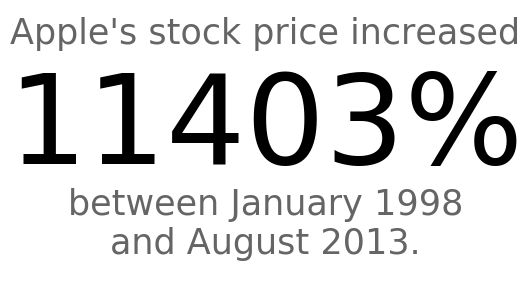

In [9]:
# Set size of figure: eight by five.
plt.figure(figsize=(8, 5))

# Create text:
plt.text(x = 0.5,                              # at horizontal = 0.5
         y = 0.9,                              # at vertical = 0.9
         s = 'Apple\'s stock price increased', # content of text (string)
         ha = 'center',                        # center-aligned horizontally
         va = 'center',                        # center-aligned vertically
         size = 35,                            # font size = 35
         alpha = 0.6)                          # alpha = 0.6 --> 60% opaque; 40% clear


# Create text:
# at (horizontal = 0.5, vertical = 0.55)
# stating the percent change (s means string)
# center-aligned
# font size 125
# alpha = 1 --> totally opaque

plt.text(x = 0.5,
         y = 0.55,
         s = str(round(pct_change)) + '%',
         ha = 'center',
         va = 'center',
         size = 125,
         alpha = 1)

# Create text:
# at (horizontal = 0.5, vertical = 0.25)
# stating "between January 1998 and August 2013"
# with a line break in between "1998" and "and"
# center-aligned
# font size 35
# alpha = 0.6 --> 40% clear; 60% opaque
plt.text(x = 0.5,
         y = 0.2,
         s = 'between January 1998\nand August 2013.',
         ha = 'center',
         va = 'center',
         size = 35,
         alpha = 0.6)

# No axes.
plt.axis('off');

It is often a bad idea to simply report one number. By giving only one number, we can often be misleading. Let's avoid this!
- I got a 74% on my last exam.
    - I got a 74% on my last exam. The class average was a 56%.
- There were 62,984,828 votes cast for Trump in the 2016 Presidential election.
    - There were 65,853,514 votes cast for Clinton and 62,984,828 votes cast for Trump in the 2016 Presidential election.
- Our company earned 5MM (five million) dollars last year.
    - Our company earned 5MM last year. This is our highest yet; our company had an average of 2MM in revenue over all previous years.


- ***My "best practice" recommendation***: Rather than reporting one number, provide context by comparing multiple numbers.

---

**Example 2**: Suppose we wanted to compare AAPL performance to Dow growth.

In [10]:
# DOW Closing Stock Price on January 2, 1998.
print(stocks[(stocks['date'] == min(stocks['date'])) & (stocks['ticker'] == 'DOW')]['close'])

# DOW Closing Stock Price on August 9, 2013.
print(stocks[(stocks['date'] == max(stocks['date'])) & (stocks['ticker'] == 'DOW')]['close'])

3926    19.0287
Name: close, dtype: float64
7851    38.08
Name: close, dtype: float64


In [11]:
aapl_pct_change = 100 * (454.37 - 3.95) / 3.95
dow_pct_change = 100 * (38.08 - 19.0287) / 19.0287

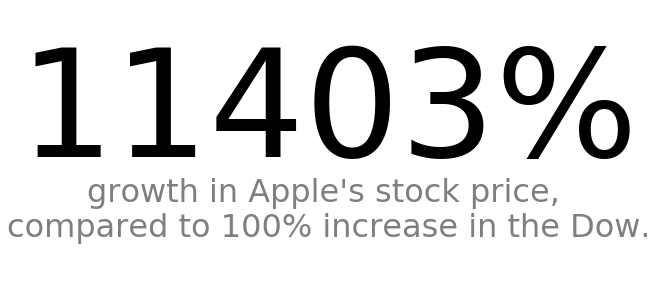

In [12]:
# Set size of figure: eight by five.
plt.figure(figsize=(8, 5))

# Create text:
# at (horizontal = 0.5, vertical = 0.6)
# stating the percent change (s means string)
# center-aligned
# font size 150
# alpha = 1 --> totally opaque

plt.text(x = 0.5,
         y = 0.6,
         s = str(round(aapl_pct_change)) + '%',
         ha = 'center',
         va = 'center',
         size = 150,
         alpha = 1)

# Create text:
# at (horizontal = 0.5, vertical = 0.25)
# stating "growth in Apple's stock price, compared to 100% increase in the Dow."
# with a line break in between "price" and "compared"
# center-aligned
# font size 32
# alpha = 0.5 --> 50% clear; 50% opaque
plt.text(x = 0.5,
         y = 0.25,
         s = 'growth in Apple\'s stock price, \ncompared to ' + str(round(dow_pct_change)) + '% increase in the Dow.',
         ha = 'center',
         va = 'center',
         size = 32,
         alpha = 0.5)

# No axes.
plt.axis('off');

Identifying the right combination of `figsize`, `x`, `y`, `size`, line breaks (`\n`) in `s`, and so on will mostly be done through guess-and-check. 
- ***My "best practice" recommendation***: copy what exists now to your next use, then tweak as needed!

**Practice 3**: Report that `GOOG` (Google) grew from 100.76 in August 2004 to 890.31 in August 2013. (I've given you the `goog_pct_change` below.) Be sure to compare it to another number!

In [13]:
goog_pct_change = 100 * (890.31 - 100.76) / (100.76)

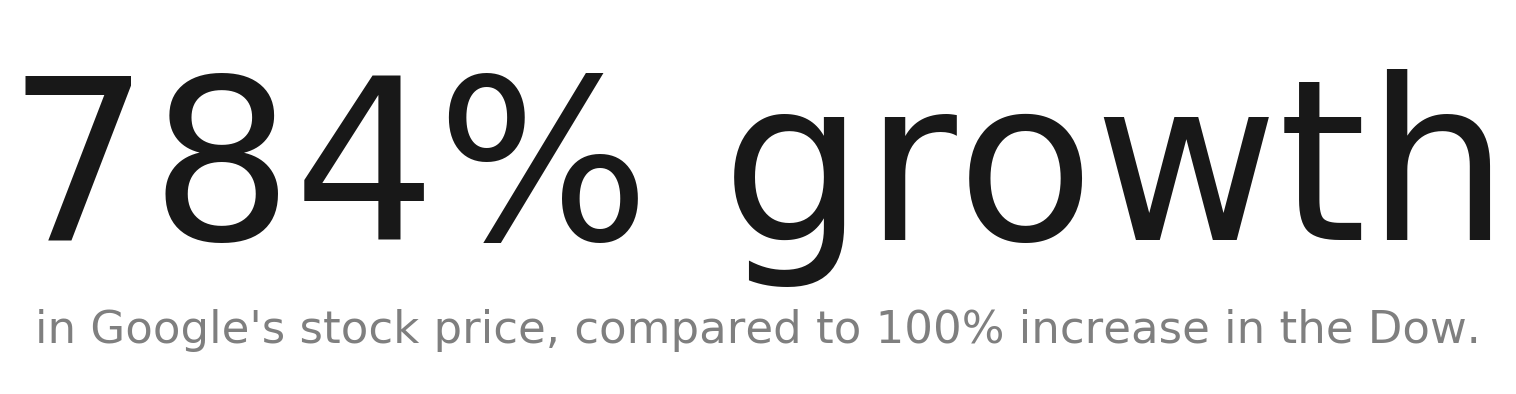

In [14]:
# Set size of figure: ten by seven.
plt.figure(figsize=(10, 7))

# Create text:
# at (horizontal = 0.5, vertical = 0.55)
# stating the percent change (s means string)
# center-aligned
# font size 225
# alpha = 0.9

plt.text(x = 0.5,
         y = 0.55,
         s = str(round(goog_pct_change)) + '% growth',
         ha = 'center',
         va = 'center',
         size = 225,
         alpha = 0.9)

# Create text:
# at (horizontal = 0.5, vertical = 0.15)
# stating "in Google's stock price, compared to 100% increase in the Dow."
# center-aligned
# font size 45
# alpha = 0.5
plt.text(x = 0.5,
         y = 0.15,
         s = 'in Google\'s stock price, compared to ' + str(round(dow_pct_change)) + '% increase in the Dow.',
         ha = 'center',
         va = 'center',
         size = 45,
         alpha = 0.5)

# No axes.
plt.axis('off');

As Einstein said, "Everything should be as simple as it can be, but not simpler." This is pretty simple. If it works... use it!
- It's not lost in a table.
- It's very clearly calling out what we want to emphasize.
- Understanding `x`, `y`, `fontsize`, etc. will be helpful later if we want to annotate a plot with text.

![](./images/wordart.png)

But I also understand that we could have done the above with Microsoft WordArt... so let's do something a bit more sophisticated.

---

**Example 4**: Suppose we wanted to compare AAPL performance to Dow growth using a bar chart.

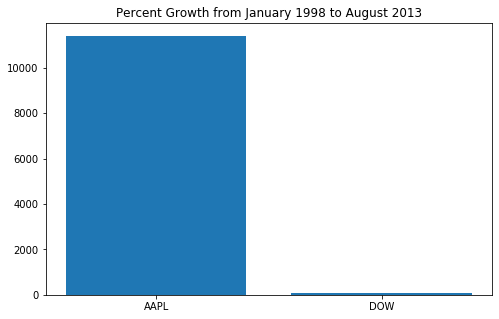

In [15]:
# Set size of figure: eight by five.
plt.figure(figsize=(8, 5))

# Create a bar chart.
# plt.bar() will create a vertical bar chart.
plt.bar(['AAPL', 'DOW'], # We have to specify our X labels/location.
        [aapl_pct_change, dow_pct_change]) # We have to specify the Y height.

# Add a title and show the plot.
plt.title('Percent Growth from January 1998 to August 2013');

**If you are reporting one or two numbers**, then:
- simply state the numbers, or
- compare numbers using a bar chart.

What you choose to do depends on the time and energy you have.

Remember that it is usually a bad idea to just report one number!

---

#### Commonly, we want to visualize *distributions*.
- The **distribution** of a variable is 1) the set of all values of that variable and 2) how frequently we observe each value.

![](./images/household_income.png)

- This is a visual representation of all of our data. We can then use this to answer lots of other questions.
    - What is the likeliest income for someone to have?
    - What is the range of incomes?
    - How likely is it that someone has an income above 50,000 dollars? Between 100,000 and 150,000 dollars?

### If your goal is to visualize the distribution of one variable, then:
- if that variable is qualitative: **use a bar chart**.
- if that variable is quantitative: **use a histogram**.

**Example 5**: Suppose we wanted to visualize the distribution of stock values. (That is, how many values did we observe for each stock?)

In [16]:
stocks['ticker'].value_counts()

NKE     3926
YHOO    3926
DOW     3926
INTC    3926
SBUX    3926
AAPL    3926
GOOG    2260
NDAQ    2139
Name: ticker, dtype: int64

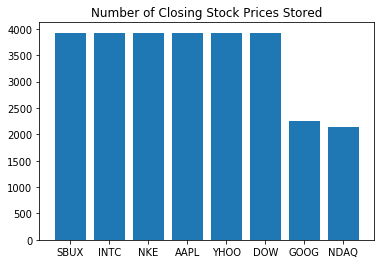

In [17]:
# Create a bar chart.
# plt.bar() will create a vertical bar chart.
# We have to pass in our X (labels) and Y (values).
plt.bar(['SBUX', 'INTC', 'NKE', 'AAPL', 'YHOO', 'DOW', 'GOOG', 'NDAQ'],
        stocks['ticker'].value_counts())

# Add a title and show the plot.
plt.title('Number of Closing Stock Prices Stored');

**Example 6**: Suppose we wanted to visualize the distribution of stock values but write out the name instead of using the stock ticker. What's the problem here?

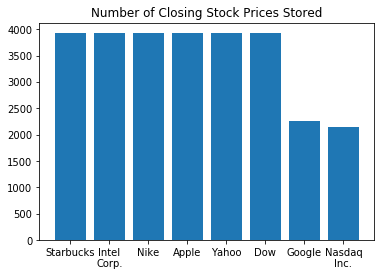

In [18]:
# Create a bar chart.
# plt.bar() will create a vertical bar chart.
# We have to pass in our X (labels) and Y (values).
plt.bar(['Starbucks', 'Intel\nCorp.', 'Nike', 'Apple', 'Yahoo', 'Dow', 'Google', 'Nasdaq\nInc.'],
        stocks['ticker'].value_counts())

# Add a title and show the plot.
plt.title('Number of Closing Stock Prices Stored');

**Example 7**: Suppose we wanted to visualize the distribution of stock values but write out the name instead of using the stock ticker. We can get around the above issue by creating a **horizontal bar chart**.

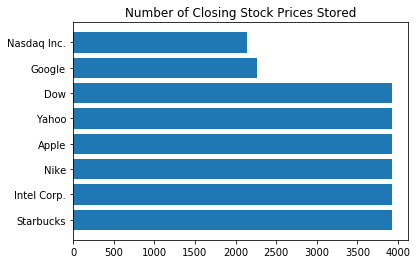

In [19]:
# plt.barh() will create a horizontal bar chart. (Note the h at the end of bar!)
# We have to pass in our values and labels again. Luckily, we don't need to swap the order!

plt.barh(['Starbucks', 'Intel Corp.', 'Nike', 'Apple', 'Yahoo', 'Dow', 'Google', 'Nasdaq Inc.'],
         stocks['ticker'].value_counts())

plt.title('Number of Closing Stock Prices Stored');

**Example 8**: Suppose we wanted to visualize the distribution of closing stock prices for `SBUX`.

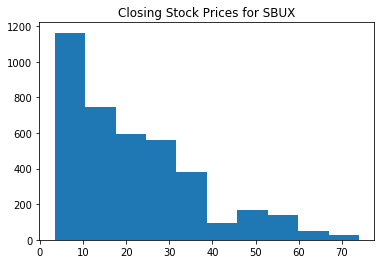

In [20]:
plt.hist(stocks[stocks['ticker'] == 'SBUX']['close'])
plt.title('Closing Stock Prices for SBUX');

In [21]:
stocks[stocks['ticker'] == 'SBUX']['close'].describe()

count    3926.000000
mean       21.644001
std        14.793992
min         3.444280
25%         9.671480
50%        17.994200
75%        29.533600
max        73.989300
Name: close, dtype: float64

- Note that histograms are easier to produce. When dealing with qualitative variables, we need to tell our bar chart what the X values are. When dealing with quantitative variables, the histogram can infer what it is!
- However, also note that histograms can vary wildly based on how many bins ("categories") there are.

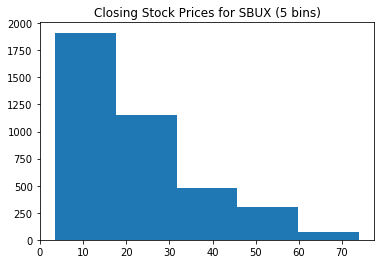

In [22]:
plt.hist(stocks[stocks['ticker'] == 'SBUX']['close'], bins=5)
plt.title('Closing Stock Prices for SBUX (5 bins)');

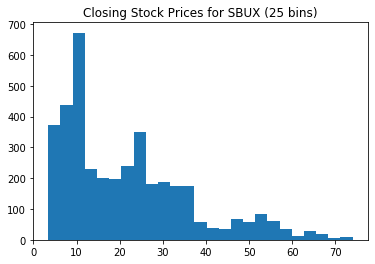

In [23]:
plt.hist(stocks[stocks['ticker'] == 'SBUX']['close'], bins=25)
plt.title('Closing Stock Prices for SBUX (25 bins)');

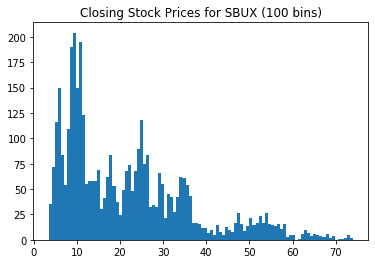

In [24]:
plt.hist(stocks[stocks['ticker'] == 'SBUX']['close'], bins=100)
plt.title('Closing Stock Prices for SBUX (100 bins)');

There is no best number of bins and any guidelines about number of bins will usually depend on the shape of the data. 
- ***My "best practice" recommendation***: Add a kernel density estimate (`kde`) that will attempt to estimate what the true probability density function (pdf) will look like. This can be done (easily) in `seaborn`, a Python visualization library built on top of `matplotlib`.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


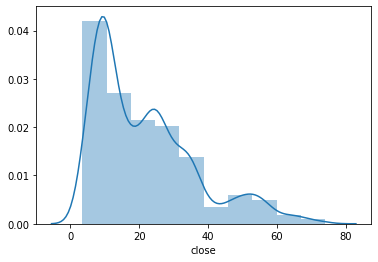

In [25]:
sns.distplot(stocks[stocks['ticker'] == 'SBUX']['close'], bins=10, kde = True);

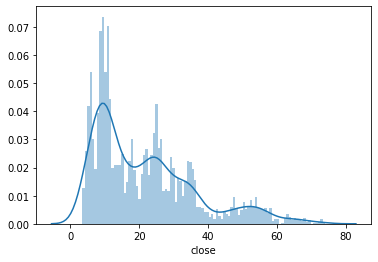

In [26]:
sns.distplot(stocks[stocks['ticker'] == 'SBUX']['close'], bins=100, kde = True);

- ***My "best practice" recommendation***: Note that a kernel density estimate might be confusing to some stakeholders (clients, boss, etc.). Consider using `kde = True` only for exploratory visualization.
    
---

**Practice 9**: Visualize the distribution of `GOOG` closing prices. Generate it with a kernel density estimate and tweak the number of bins to get as close to the kde as possible, then generate your plot in a way you'd likely present it to a stakeholder.

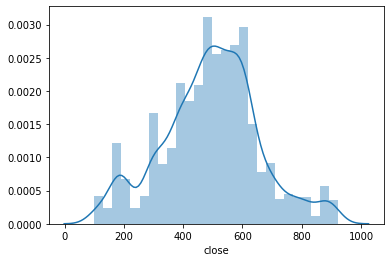

In [27]:
sns.distplot(stocks[stocks['ticker'] == 'GOOG']['close'], bins=27, kde = True);

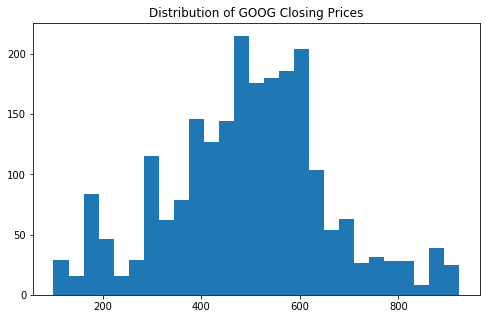

In [28]:
plt.figure(figsize = (8, 5))
plt.title("Distribution of GOOG Closing Prices")
plt.hist(stocks[stocks['ticker'] == 'GOOG']['close'], bins=27);

**If your goal is to visualize the distribution of one variable**, then:
- if that variable is qualitative: use a bar chart.
- if that variable is quantitative: use a histogram.

Remember that if you are visualizing with a histogram, then your number of bins might substantially affect how your distribution looks, especially for small sample sizes. Consider using a kernel density estimate to help you visualize a smooth distribution of your data during your **exploratory** phase, but you *may* want to exclude the kde for your **explanatory** (reporting) phase.

---

#### Commonly, we want to visualize *relationships*.
- The **relationship** between two variables allows us to understand if and how one variable changes when another changes.

![](./images/scatter.jpeg)

- This is a visual representation of all of our data. We can use this to answer lots of other questions.
    - Does there appear to be any association between ice cream and murders?
    - As ice cream consumption increases, how does the number of murders change?
    - **Note: We cannot say anything about causality here!**

### If your goal is to visualize the relationship between two variables, then:
- if you are comparing two qualitative variables, **use a table or a heatmap**.
    - Note: When comparing two qualitative variables, we're usually looking at counts, averages, or some other summary by each of the two categorical variables... so in many cases it's _technically_ three variables.
- if you are comparing time and another quantitative variable, **use a lineplot**.
- if you are comparing two (non-time) quantitative variables, **use a scatterplot**.
- if you are comparing a qualitative variable and a quantitative variable, **use stacked histograms**.

**Example 10**: Suppose we wanted to examine how stock volume changes over days of week and by stock ticker.

In [29]:
# Generate a PivotTable examining the average volume.

df = pd.pivot_table(stocks,
               values = 'volume',    # the variable we want to measure
               index = 'ticker',    # the rows of our PivotTable - here, it's the stock tickers
               columns = 'weekday', # the columns of our PivotTable - here, it's the days of the week
               aggfunc = np.mean)   # the function we use to aggregate - here, it's numpy.mean()

In [30]:
df

weekday,Friday,Monday,Thursday,Tuesday,Wednesday
ticker,,,,,
AAPL,1.902484e+07,1.858339e+07,2.097426e+07,2.019500e+07,2.092777e+07
DOW,6.882802e+06,6.598802e+06,7.501700e+06,7.154039e+06,7.138379e+06
GOOG,5.183891e+06,4.800891e+06,4.865088e+06,5.061043e+06,5.046453e+06
INTC,6.696165e+07,5.960552e+07,6.896388e+07,6.640966e+07,7.169325e+07
NDAQ,2.240021e+06,2.053153e+06,2.318761e+06,2.346616e+06,2.326109e+06
NKE,6.265526e+06,5.711087e+06,6.415291e+06,6.178212e+06,6.419218e+06
SBUX,9.384170e+06,7.814195e+06,9.587358e+06,8.359079e+06,8.527534e+06
YHOO,2.247367e+07,2.235907e+07,2.565689e+07,2.470382e+07,2.623490e+07


In [31]:
# How might I rearrange my column names to be a bit more intuitive?

df = df[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']]

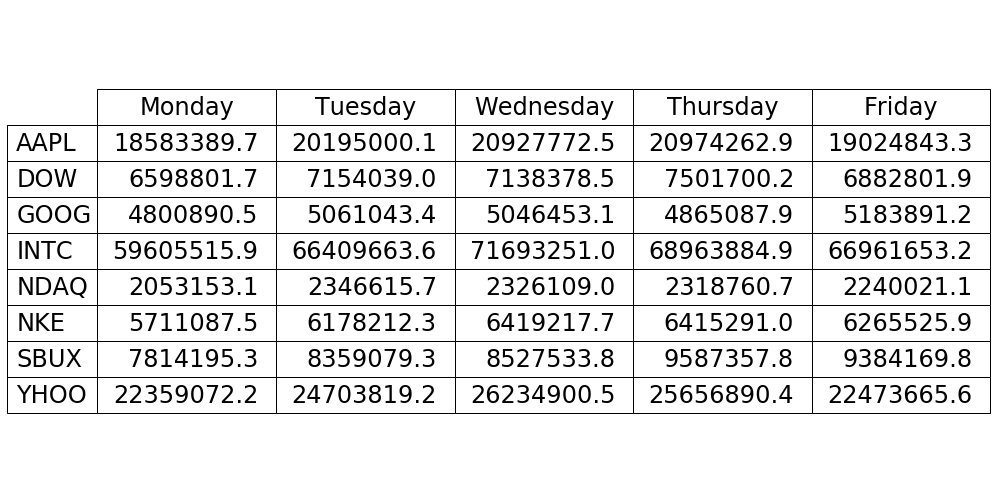

In [32]:
plt.figure(figsize=(16,9))
table = plt.table(cellText=np.array(round(df,1)),
          rowLabels=df.index,
          colLabels=df.columns,
          loc='center')

table.set_fontsize(24)
table.scale(1,3)
plt.axis('off');

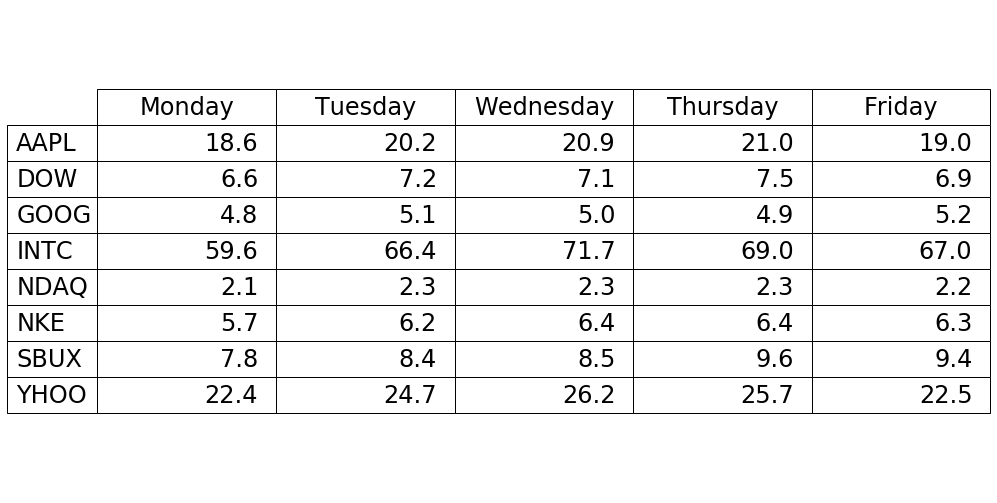

In [33]:
plt.figure(figsize=(16,9))
table = plt.table(cellText=np.array(round(df/1_000_000,1)),
          rowLabels=df.index,
          colLabels=df.columns,
          loc='center')

table.set_fontsize(24)
table.scale(1,3)
plt.axis('off');

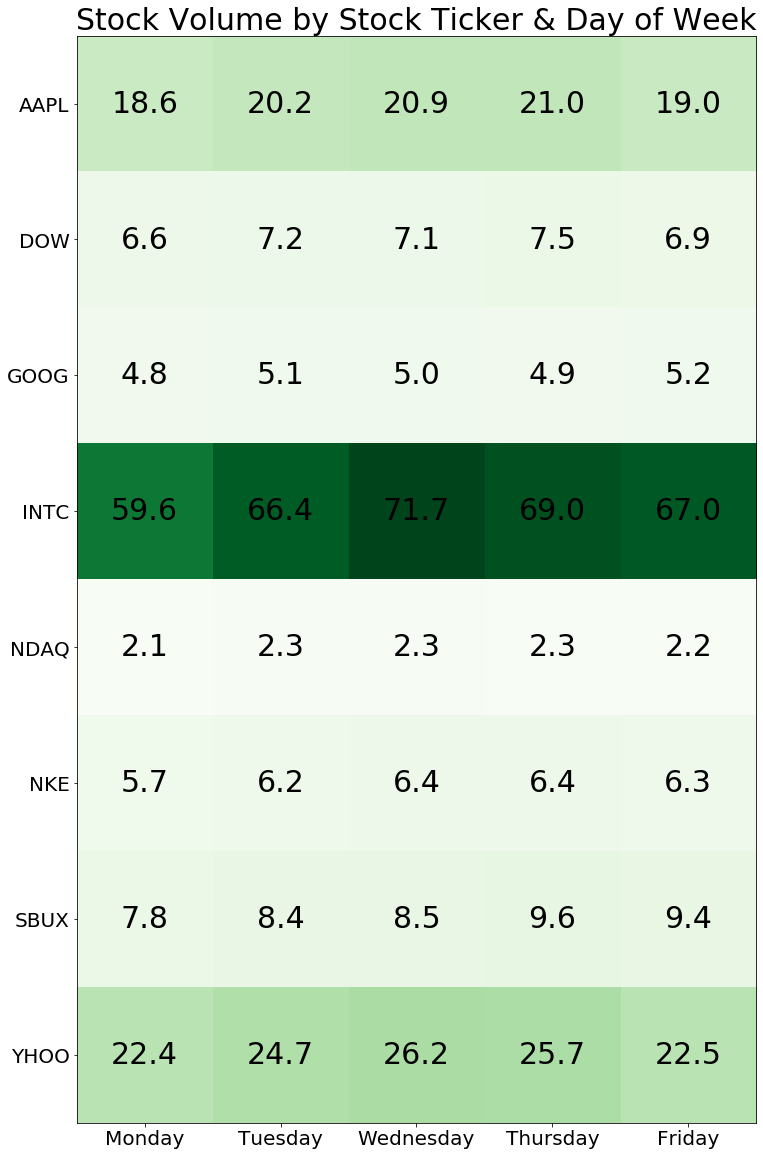

In [34]:
# This code is generated with adaptations from 
# https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html

fig, ax = plt.subplots(figsize=(20, 20))

# Create heatmap.
table = ax.imshow(X=np.array(round(df,1)/1_000_000),
                   cmap = 'Greens')

ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))

ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.index)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.title("Stock Volume by Stock Ticker & Day of Week", fontsize = 30)

for i in range(len(df.columns)):
    for j in range(len(df.index)):
        text = ax.text(i,
                       j,
                       round(df.loc[df.index[j], df.columns[i]]/1_000_000,1),
                       ha="center",
                       va="center",
                       color='k',
                       fontsize = 30);

A more commonly seen implementation of a heatmap uses the [Seaborn library](https://seaborn.pydata.org).

In [35]:
stocks.head()

,weekday,date,high,low,close,volume,ticker
0,Friday,1998-01-02,3.95098,3.28236,3.95098,24947201.10,AAPL
1,Monday,1998-01-05,4.02635,3.69325,3.89020,22344145.08,AAPL
2,Tuesday,1998-01-06,4.98432,3.58628,4.60502,63150252.55,AAPL
3,Wednesday,1998-01-07,4.68040,4.20871,4.24032,36978255.52,AAPL
4,Thursday,1998-01-08,4.52965,4.11875,4.39107,27687622.95,AAPL


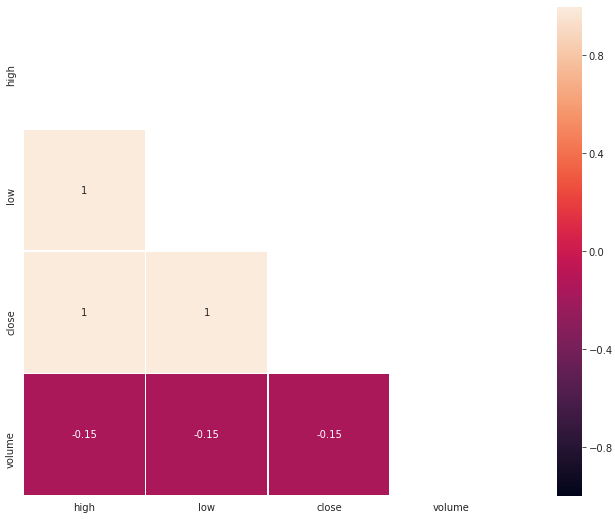

In [36]:
# This code is taken with minor modifications from https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Establish size of figure.
plt.figure(figsize=(16,9))

# Generate 10 variables of 200 random observations.
corr = stocks.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, square=True, annot=True, vmin=-1, vmax=1, linewidths=.5)

**Example 11**: Suppose we wanted to examine how stock volume changes over time for GOOG.

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


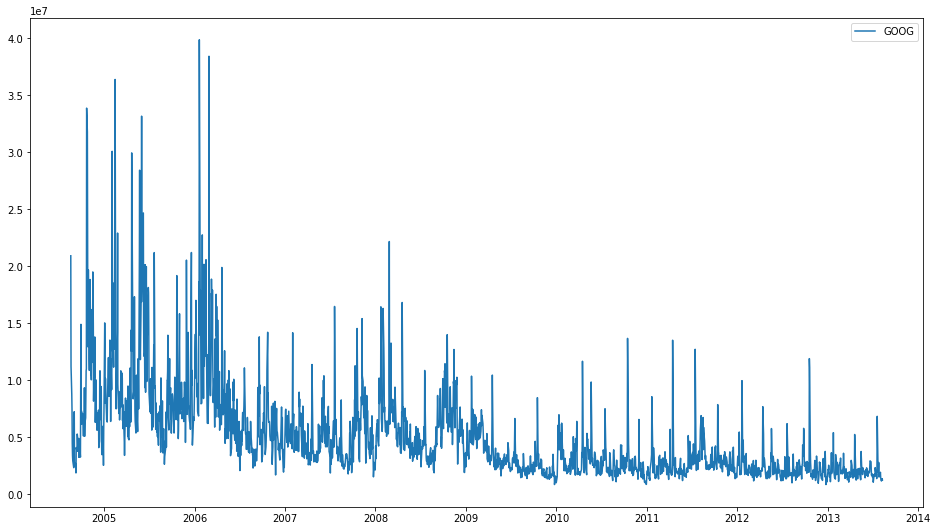

In [37]:
# Establish the size of the figure.
plt.figure(figsize=(16, 9))

# Create line plot of GOOG volume over time.
plt.plot(stocks[stocks['ticker'] == 'GOOG']['date'],
         stocks[stocks['ticker'] == 'GOOG']['volume'],
         label = 'GOOG')

plt.legend(loc = 'upper right');

**Example 12**: Suppose we wanted to examine how stock volume changes over time for GOOG *and* for NKE.

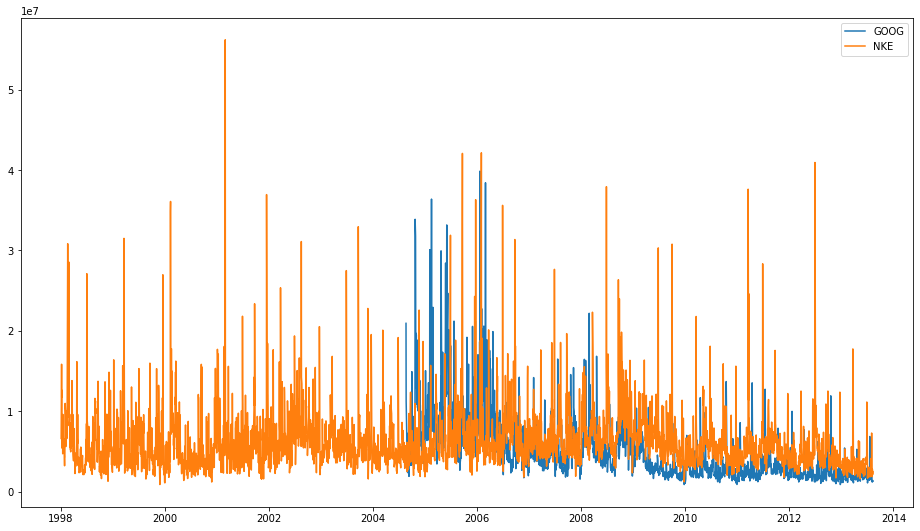

In [38]:
# Establish the size of the figure.
plt.figure(figsize=(16, 9))

# Create line plot of GOOG volume over time.
plt.plot(stocks[stocks['ticker'] == 'GOOG']['date'],
         stocks[stocks['ticker'] == 'GOOG']['volume'],
         label = 'GOOG')

# Create line plot of NKE volume over time.
plt.plot(stocks[stocks['ticker'] == 'NKE']['date'],
         stocks[stocks['ticker'] == 'NKE']['volume'],
         label = 'NKE')

plt.legend(loc = 'upper right');

**Example 13**: Suppose we wanted to examine how the stock volume changed from the first day of trading in 2012 to the first day of trading in 2013 for all stock tickers.
- A **slopegraph** is what Cole Nussbaumer Knaflic refers to as a line graph with two points on the x-axis.

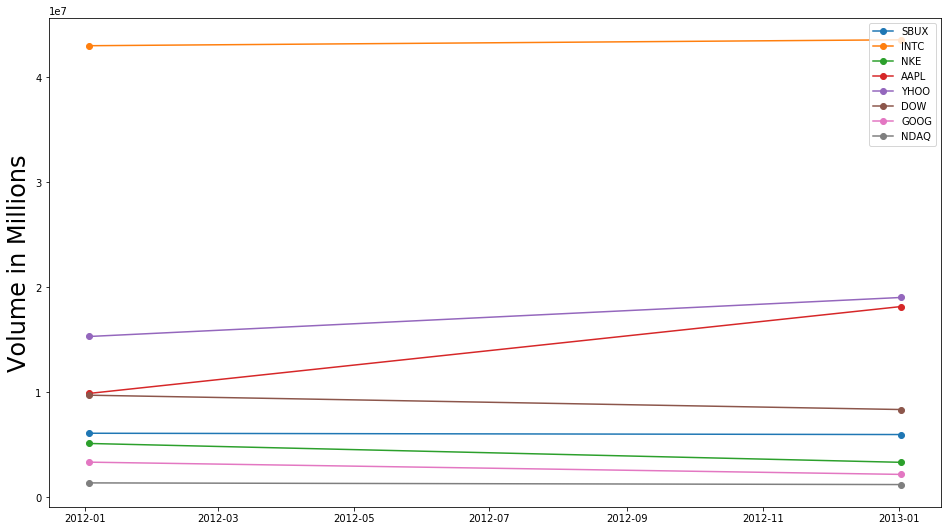

In [39]:
# Establish the size of the figure.
plt.figure(figsize=(16, 9))

# Create line plot of all stock volumes over 2012.
for i in ['SBUX', 'INTC', 'NKE', 'AAPL', 'YHOO', 'DOW', 'GOOG', 'NDAQ']:
    plt.plot(stocks[(stocks['ticker'] == i) & ((stocks['date'] == '2012-01-03') | (stocks['date'] == '2013-01-02'))]['date'],
         stocks[(stocks['ticker'] == i) & ((stocks['date'] == '2012-01-03') | (stocks['date'] == '2013-01-02'))]['volume'],
         label = i, marker = 'o')
    
plt.legend(loc = 'upper right')
plt.ylabel("Volume in Millions", fontsize = 24);

**Example 14**: Suppose we wanted to visualize how strongly correlated high daily prices and daily trading volumes are.

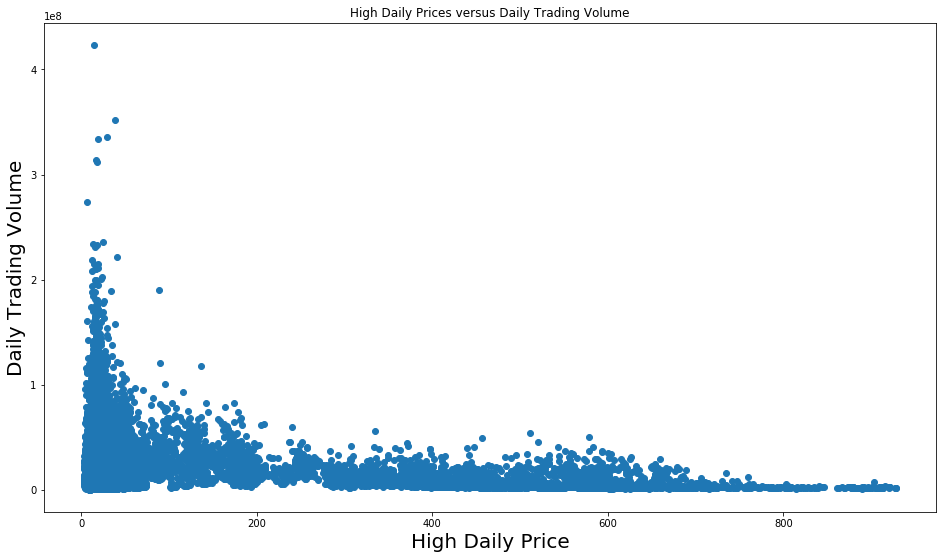

In [40]:
# Establish the size of the figure.
plt.figure(figsize=(16, 9))

# Create scatterplot of high prices versus volume.
plt.scatter(stocks['high'],
            stocks['volume']);

plt.title("High Daily Prices versus Daily Trading Volume")
plt.ylabel("Daily Trading Volume", fontsize = 20)
plt.xlabel("High Daily Price", fontsize = 20);

**Example 15**: Suppose you want to visualize the distribution of low prices for `GOOG`, `SBUX`, and `AAPL`.

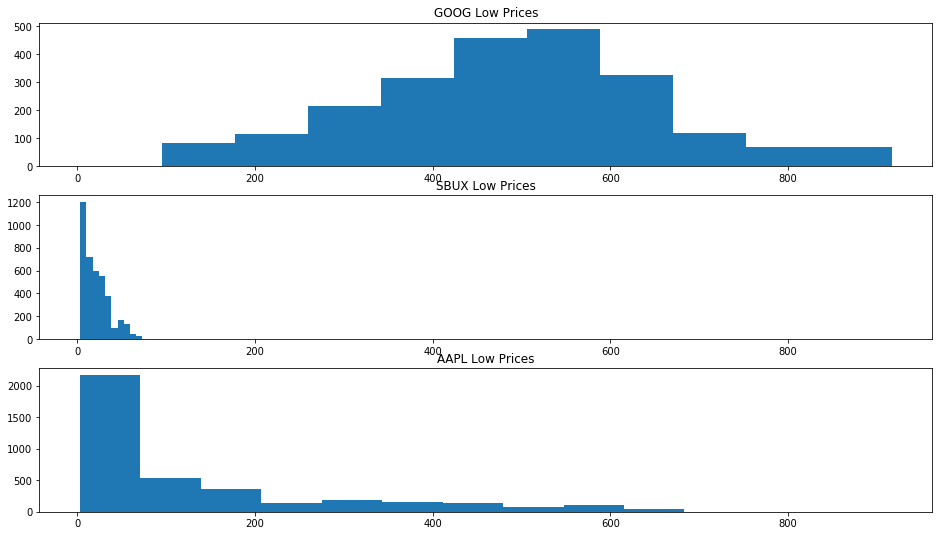

In [41]:
# Establish figure size.
plt.figure(figsize = (16,9))

# We can create subplots, which allows us to have multiple subplots in the same plot.
# plt.subplot(311) means we have 3 rows, 1 column, and are referencing plot 1.
ax1 = plt.subplot(311)
ax1.set_title('GOOG Low Prices')
ax1.hist(stocks[stocks['ticker'] == 'GOOG']['low']);

# plt.subplot(312) means we have 3 rows, 1 column, and are referencing plot 2.
ax2 = plt.subplot(312, sharex=ax1)
ax2.set_title('SBUX Low Prices')
ax2.hist(stocks[stocks['ticker'] == 'SBUX']['low']);

# plt.subplot(313) means we have 3 rows, 1 column, and are referencing plot 3.
ax3 = plt.subplot(313, sharex=ax2)
ax3.set_title('AAPL Low Prices')
ax3.hist(stocks[stocks['ticker'] == 'AAPL']['low']);

**Example 16**: Suppose you want to visualize the distribution of low prices for `GOOG`, `SBUX`, and `AAPL` but want to explicitly show the differences in means between the groups.

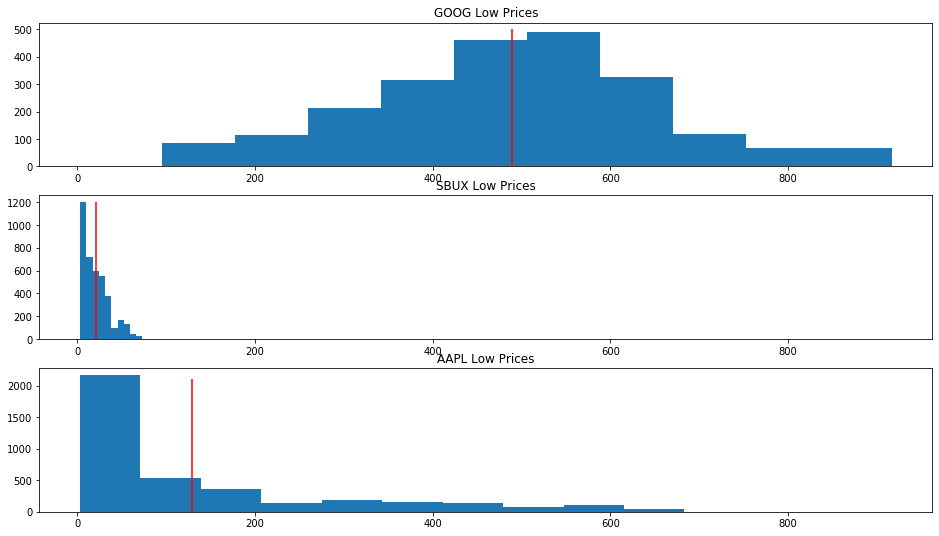

In [42]:
# Establish figure size.
plt.figure(figsize = (16,9))

# We can create subplots, which allows us to have multiple subplots in the same plot.
# plt.subplot(311) means we have 3 rows, 1 column, and are referencing plot 1.
ax1 = plt.subplot(311)
ax1.set_title('GOOG Low Prices')
ax1.hist(stocks[stocks['ticker'] == 'GOOG']['low'])
ax1.vlines(x = np.mean(stocks[stocks['ticker'] == 'GOOG']['low']), ymin = 0, ymax = 500, color = 'r');

# plt.subplot(312) means we have 3 rows, 1 column, and are referencing plot 2.
ax2 = plt.subplot(312, sharex=ax1)
ax2.set_title('SBUX Low Prices')
ax2.hist(stocks[stocks['ticker'] == 'SBUX']['low'])
ax2.vlines(x = np.mean(stocks[stocks['ticker'] == 'SBUX']['low']), ymin = 0, ymax = 1200, color = 'r');

# plt.subplot(313) means we have 3 rows, 1 column, and are referencing plot 3.
ax3 = plt.subplot(313, sharex=ax2)
ax3.set_title('AAPL Low Prices')
ax3.hist(stocks[stocks['ticker'] == 'AAPL']['low'])
ax3.vlines(x = np.mean(stocks[stocks['ticker'] == 'AAPL']['low']), ymin = 0, ymax = 2100, color = 'r');

Some people will use stacked bar charts to visualize the distribution of variables broken out into categories. I generally prefer to not do this.
- ***My "best practice" recommendation***: Stay away from stacked bar charts; there are usually better ways to communicate what you want to communicate.

### If-This-Then-That Rules
- If I am stating one or two numbers, then:
    - **simply report the numbers**.
    - compare numbers using a **bar chart**.
- If I am visualizing the distribution of one variable, then:
    - If that variable is qualitative: **use a bar chart**.
    - If that variable is quantitative: **use a histogram**.
- If I am visualizing the relationship between two variables, then:
    - If both variables are qualitative, then: 
        - If there are at most three categories for both variable, then **use a table**.
        - If there are more than three categories in either variable, then **use a heatmap**.
    - If both variables are quantitative, then:
        - If one variable is time, then **use a line plot**.
        - Otherwise, **use a scatterplot**.
    - If one variable is quantitative and another is qualitative then:
        - **Use a bunch of histograms**.
        - Stacked bar charts, if you choose to do so.

## Interview Question


<details><summary>You are analyzing attrition (employees leaving a company). You have a dataset of all employees, with specific features on their role (department, position, salary, etc.) and whether or not they left the company. Your analysis should indicate how many individuals left the organization and identify any trends associated with attrition (ex. concentration, etc.) What visualizations would you build to communicate your findings to the client? (Answers can - and should - vary!)
</summary>
    
- Since "left company" is a categorical variable, we could generate a heatmap comparing these values with other categorical variables like department, position, etc.
- We could generate stacked histograms comparing "left company" for quantitative variables. For example, visualize salary for those who stayed versus those who left.
</details>

# Intermediate: Improving the basic visualization.

If you're familiar with before/after images, they're a convenient way for us to see how drastically things have changed.

<img src="./images/santorini_before.jpg" alt="drawing" width="750"/>

<img src="./images/santorini_after.jpg" alt="drawing" width="750"/>

- Images pulled from [this site](https://photographyconcentrate.com/15-snazzy-lightroom-and-afters/); recommendation by Shannon Bingham, DSI-US-6.

What we've done so far is to create the "before" image. We've identified a ***good*** tool for the job. Now let's make it a ***great*** tool.

Before getting into a specific list of things to consider, let's head to this blog post about "[Unmaking Graphs](https://towardsdatascience.com/unmaking-graphs-f584625c5bfd)."

**Example 17**: Suppose we wanted to visualize two stock prices over time. It would be helpful to be able to compare these stock prices to one another as well.

<details><summary>What type of chart would we likely want to create?</summary>

- If we are visualizing the relationship between two variables:
    - If both variables are quantitative:
        - If one quantitative variable is time:
            - If we are visualizing over more than two time points:
                - Let's do a line graph!
</details>

In [43]:
import matplotlib.dates as dates
import datetime

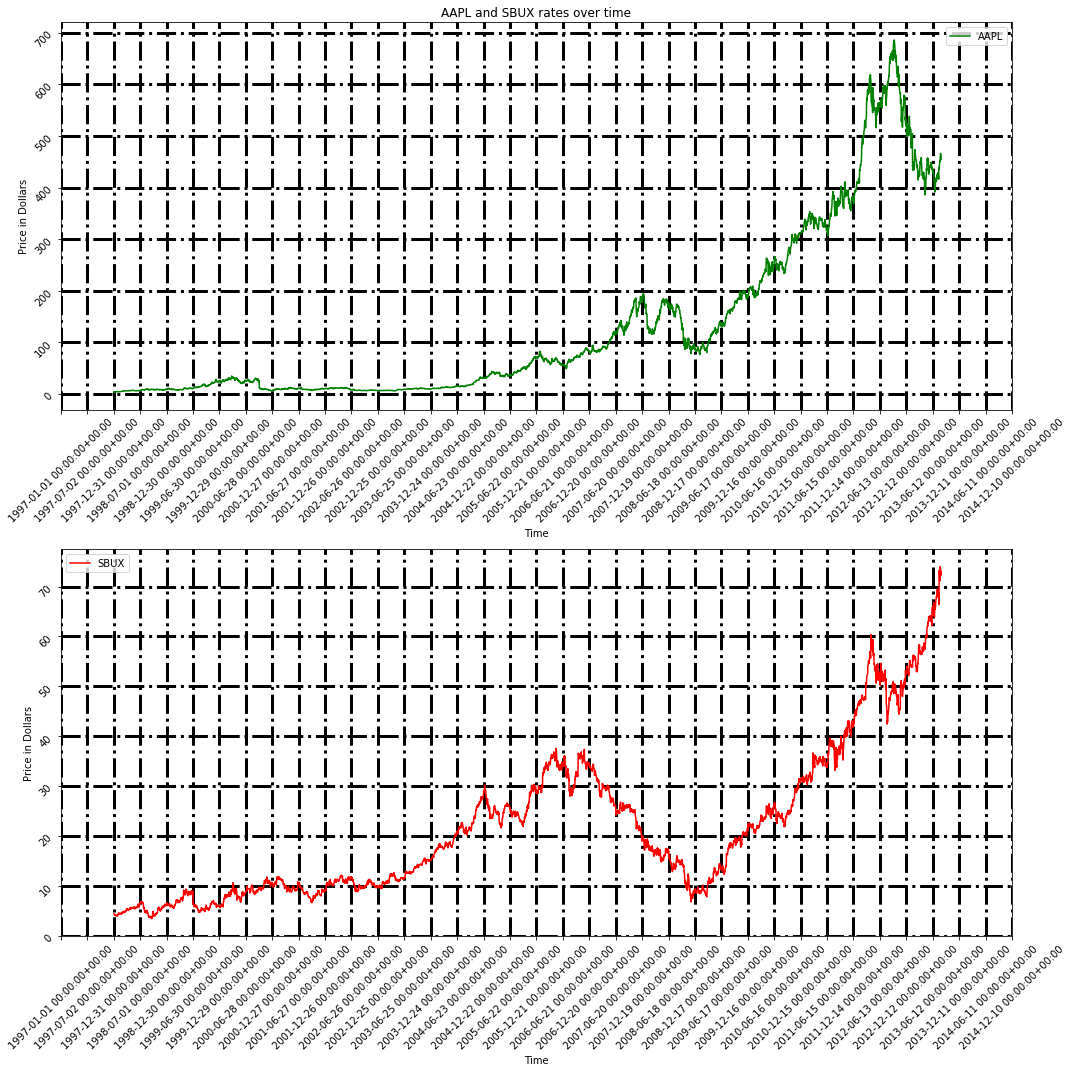

In [44]:
# Establish the size of the figure.
plt.figure(figsize=(15, 15))

# Create two plots. (2 rows, 1 column, referring to 1st plot)
plt.subplot(2, 1, 1)

# Create line plot of AAPL closing price over time.
plt.plot(stocks[stocks['ticker'] == 'AAPL']['date'],
         stocks[stocks['ticker'] == 'AAPL']['close'],
         c = 'green',
         label = 'AAPL')

# Create the legend and set it in the upper-right hand corner.
plt.legend(loc = 'upper right')

# Create a grid in the background.
plt.grid(True, linewidth=3, linestyle = '-.', c='black')

# Create tick mark labels on the X axis and rotate them.
plt.xticks(dates.drange(dstart=datetime.datetime(1997, 1, 1),
                        dend=datetime.datetime(2014, 12, 31),
                        delta=datetime.timedelta(weeks=26)),
           dates.num2date(dates.drange(dstart=datetime.datetime(1997, 1, 1),
                        dend=datetime.datetime(2014, 12, 31),
                        delta=datetime.timedelta(weeks=26))), rotation = 45)

# Create tick mark labels on the Y axis and rotate them.
plt.yticks(rotation = 45)

plt.ylabel("Price in Dollars")
plt.xlabel("Time")
plt.title("AAPL and SBUX rates over time")

# Create two plots. (2 rows, 1 column, referring to 2nd plot)
plt.subplot(2, 1, 2)

# Create line plot of SBUX closing price over time.
plt.plot(stocks[stocks['ticker'] == 'SBUX']['date'],
         stocks[stocks['ticker'] == 'SBUX']['close'],
         c = 'red',
         label = 'SBUX')

# Create the legend and set it in the upper-left hand corner.
plt.legend(loc = 'upper left')

# Create a grid in the background.
plt.grid(True, linewidth=3, linestyle = '-.', c='black')

# Create tick mark labels on the X axis and rotate them.
plt.xticks(dates.drange(dstart=datetime.datetime(1997, 1, 1),
                        dend=datetime.datetime(2014, 12, 31),
                        delta=datetime.timedelta(weeks=26)),
           dates.num2date(dates.drange(dstart=datetime.datetime(1997, 1, 1),
                        dend=datetime.datetime(2014, 12, 31),
                        delta=datetime.timedelta(weeks=26))), rotation = 45)

# Create tick mark labels on the Y axis and rotate them.
plt.yticks(rotation = 45)

# Create X axis label.
plt.xlabel("Time")

# Create Y axis label.
plt.ylabel("Price in Dollars")

# Great line when working with multiple subplots; makes sure they're fitted well.
plt.tight_layout();

<details><summary>Let's critique this. What do you like about these plots? What do you dislike?</summary>

- The y-axes are different, so it's hard to directly compare the two together. This could be done more efficiently in one plot.
- Red and green together is a bad idea due to colorblindness (a pretty prevalent condition). Let's pick better colors! Blue and orange are good choices for two contrasting colors.
- The grid is really "loud" and pulls attention from the series we want to study. Can we make it subtler in color and pattern or get rid of it completely?
- The x-axis has way too much information. At minimum, we can get rid of the 00:00:00+00:00 because this isn't providing any additional information. However, we can probably get rid of the days/months and make the tick marks less frequent. (We know how years are ordered, so we could just have 1998, 2003, 2008, and 2013 if we wanted!)
- Rotating the tick labels makes it tough for us to read the labels. Let's un-rotate them.
- We probably don't need the x-axis label. If we see the values 1998, 2003, 2008, and 2013, we can reasonably assume that this means years or time. Since the label isn't giving us any additional information, let's get rid of it!
- The title is hard to view. Let's make it larger.
- We can increase the size of our legend.
- This is a non-exhaustive list!
</details>

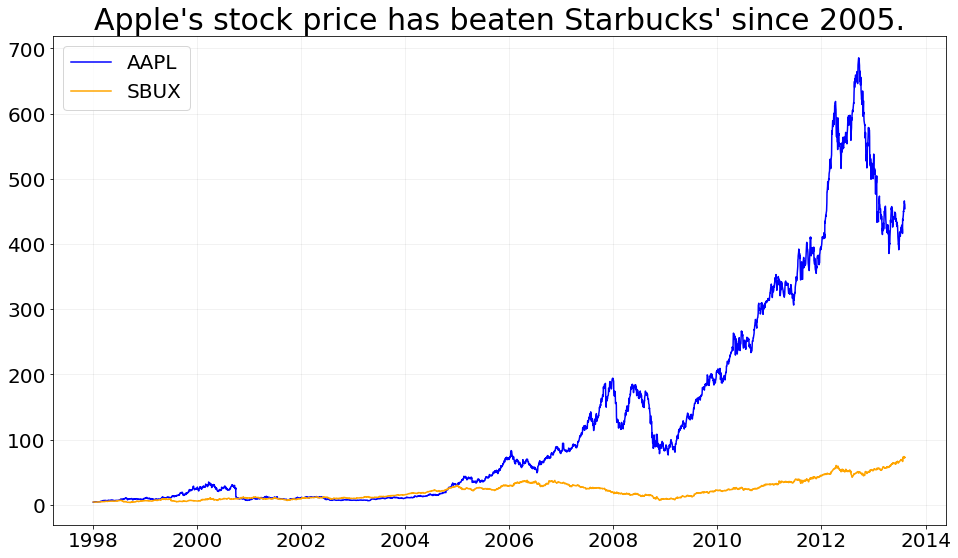

In [45]:
# Establish the size of the figure.
plt.figure(figsize=(16, 9))

# Create line plot of AAPL closing price over time.
plt.plot(stocks[stocks['ticker'] == 'AAPL']['date'],
         stocks[stocks['ticker'] == 'AAPL']['close'],
         c = 'blue',
         label = 'AAPL')

# Create line plot of SBUX closing price over time.
plt.plot(stocks[stocks['ticker'] == 'SBUX']['date'],
         stocks[stocks['ticker'] == 'SBUX']['close'],
         c = 'orange',
         label = 'SBUX')

# Create the legend and set it in the upper-left hand corner.
plt.legend(loc = 'upper left', fontsize = 20)

# Create a grid in the background.
plt.grid(True, linewidth=0.5, linestyle = '-', c='black', alpha = 0.1)

# Create tick mark labels on the Y axis and rotate them.
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Create title.
plt.title("Apple's stock price has beaten Starbucks' since 2005.", fontsize = 30);

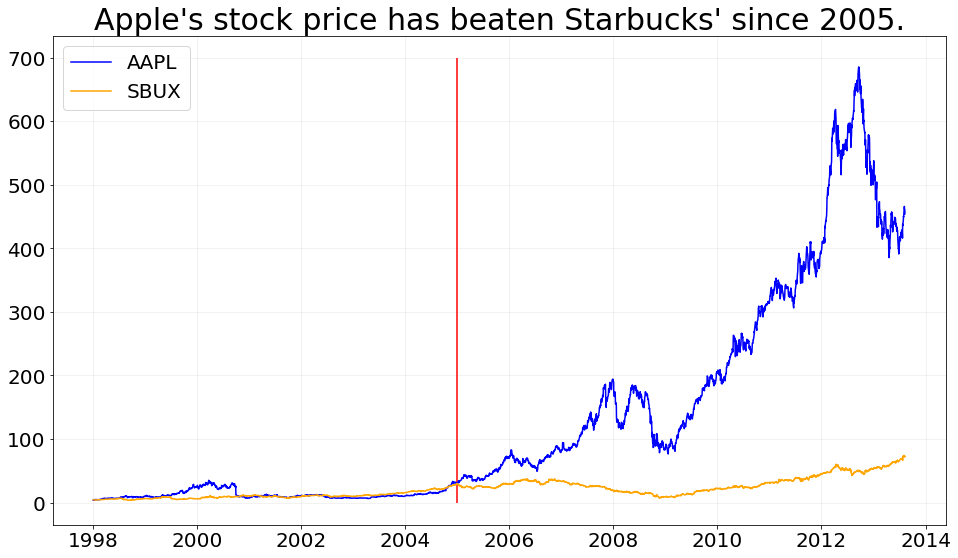

In [46]:
# Establish the size of the figure.
plt.figure(figsize=(16, 9))

# Create line plot of AAPL closing price over time.
plt.plot(stocks[stocks['ticker'] == 'AAPL']['date'],
         stocks[stocks['ticker'] == 'AAPL']['close'],
         c = 'blue',
         label = 'AAPL')

# Create line plot of SBUX closing price over time.
plt.plot(stocks[stocks['ticker'] == 'SBUX']['date'],
         stocks[stocks['ticker'] == 'SBUX']['close'],
         c = 'orange',
         label = 'SBUX')

# Create the legend and set it in the upper-left hand corner.
plt.legend(loc = 'upper left', fontsize = 20)

# Create a grid in the background.
plt.grid(True, linewidth=0.5, linestyle = '-', c='black', alpha = 0.1)

# Create tick mark labels on the Y axis and rotate them.
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Create title.
plt.title("Apple's stock price has beaten Starbucks' since 2005.", fontsize = 30)

# Add vertical line (vlines) to specifically identify the point of interest.
plt.vlines(x=datetime.datetime(2005, 1, 1), ymin=0, ymax=700, color='r');

## When de-cluttering, here is an incomplete list of things to consider doing:
### Chart Types
##### Take away pie charts. (Use a bar chart instead!)
    
![](./images/pie_chart.png)
    
##### Take away 3D charts (especially pie charts)!
    
![](./images/3d_pie_chart.jpg)
![](./images/3d_column_chart.jpg)

##### Take away secondary y-axes.
    
![](./images/secondary_y_axis.png)

### Use color effectively.
    - Avoid red/green.
    - Use a gradient.
    
![](./images/color-bar-chart.png)

    - Remove background color.
    - Color should emphasize.
    - There are ways to emphasize other than color! (Size, a label, proximity, etc.) If you are concerned that your image is too "cluttered," then consider toning down your use of color.
    
### Axes
    - Don't rotate labels.
    - Consider rotating your chart if your axis labels are too large.
    - Move borders to light grey.
    - Remove grid.
    
### Other
    - Place legend properly (if needed).
    - If lots of small categories/extreme values, consider collapsing/truncating them.
    - Order categories in sensical order. If a logical/sensical order does not exist, then from largest value to smallest value.

---
## Crafting the experience:
    - Use smart chart title.    
    - Consider the "Z".
    - Align along vertical axis.
    - Use bold to emphasize text. (But don't bold everything! Recommendations include to bold at most 10% of your text.)
    - If there is a lot going on, then walk people through it slowly.

<img src="./images/investment_1.png" width="500">

<img src="./images/investment_2.png" width="500">

# Bonus: Adding interactivity to visualizations with `bokeh`.

The [Bokeh](https://bokeh.pydata.org/en/latest/) library is a wonderful library that enables us to create interactive visualizations. The library is built in Python, but is built on top of Javascript.
- This means that we get to work in Python, but our Python code will get the benefits of what Javascript can do!

If you want to generate your own interactive visuals, I encourage you to check out the [Bokeh gallery](https://bokeh.pydata.org/en/latest/docs/gallery.html), then edit from there.

In [47]:
# This example is pulled directly from https://bokeh.pydata.org/en/latest/docs/gallery/range_tool.html
# with minor edits being made, mostly to add comments.

from bokeh.io import show, output_notebook
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool
from bokeh.plotting import figure

#from bokeh.sampledata.stocks import AAPL

# Put AAPL stock into a NumPy array.
dates = np.array(stocks[stocks['ticker'] == 'AAPL']['date'], dtype=np.datetime64)

# Specify the data.
source = ColumnDataSource(data=dict(date=dates, close=stocks[stocks['ticker'] == 'AAPL']['close']))

# Generate the top plot.
p = figure(plot_height=300,          # What is the height of the top plot? 
           plot_width=800,           # What is the width of the top plot? 
           tools="xpan",             # No tools.
           toolbar_location=None,    # No toolbar.
           x_axis_type="datetime",   # X-axis has a specific type: datetime. Ensures dates appear properly.
           x_axis_location="above",  # Y-axis needs no specific formatting/typing.
           background_fill_color="#efefef",     # Specify background color.
           x_range=(dates[1500], dates[2500]))  # Specify starting x-range for top plot. (1,500th through 2,500th value.)

# Specify the line being generated (similar to plt.plot()).
p.line('date', 'close', source=source)

# Setting label on the y-axis (vertical axis).
p.yaxis.axis_label = 'Price'

# Generate the bottom plot.
select = figure(title="Drag the middle and edges of the selection box to change the range above", # Title of the plot.
                plot_height=130,     # What is the height of the bottom plot? 
                plot_width=800,      # What is the width of the bottom plot? 
                y_range=p.y_range,   # Make sure that the y-axes have the same height for both top and bottom plots.
                x_axis_type="datetime",          # X-axis has a specific type: datetime. Ensures dates appear properly.
                y_axis_type=None,                # Y-axis needs no specific formatting/typing.
                tools="",                        # No tools. (For now; one will be added later.)
                toolbar_location=None,           # No toolbar.
                background_fill_color="#efefef") # Specify background color.

# Set up the "range tool" in the bottom plot.
range_rool = RangeTool(x_range=p.x_range) # Make sure the x-axes have the same width for the top and bottom plots.
range_rool.overlay.fill_color = "navy"    # Color the "range tool" box navy.
range_rool.overlay.fill_alpha = 0.2       # Make the "range tool" box 80% transparent.

# Specify the line being generated (similar to plt.plot()).
select.line('date', 'close', source=source)

# No grid.
select.ygrid.grid_line_color = None

# Add the range_rool tool to the select plot.
select.add_tools(range_rool)
select.toolbar.active_multi = range_rool

# Make our results show up in our Jupyter notebook.
output_notebook()

# If you want the results to show up in a .html file,
# run "from bokeh.io import output_file"
# then run "output_file('./filename.html')"

# Display these in a column with our plot (p) above the select tool in one column.
show(column(p, select))

Loading BokehJS ...

<details><summary>What is a situation in which this visual would work well?</summary>
- When you're measuring something over a long period of time and want to be able to view the whole thing and also more granularly see individual shifts.
</details>

Interactivity is something that you will generally consider using in the following cases:
1. When you want to visualize more than 3-4 variables at the same time.
    - Example [here](https://gapminder.org/tools/#$chart-type=bubbles).
2. When you want your visual to show macro (large) trends but also allow your user to get additional detail on the micro level if desired.
    - Example [here](http://www.nytimes.com/interactive/2012/10/15/us/politics/swing-history.html?_r=2&).